In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

In [2]:
df = pd.read_csv(r"C:/Users/LEGION/Jupyter/KhoaHocDuLieu/products_merged_scaler.csv")
df

,tên người đăng,giá tiền (tỷ),phố/đường,phường/thị trấn,quận/huyện,thành phố,loại hình căn hộ,diện tích đất (m2),giá/m2 (triệu/m2),giấy tờ pháp lý,số phòng ngủ,số phòng vệ sinh,tình trạng nội thất,hướng cửa chính,đặc điểm nhà/đất,tổng số tầng,ngày đăng
0,Nguyễn Duy Thắng,-0.694792,Phố Phan Đình Giót,Phường Phương Liệt,Quận Thanh Xuân,Hà Nội,"Tập Thể, Cư Xá",1.113070,-1.168189,Sổ Hồng Riêng,-0.942039,0.187183,Nội Thất Đầy Đủ,Nam,Không Rõ,-0.008558,2025-10-02
1,Mr Tran,1.495588,Khuất Duy Tiến,Phường Nhân Chính,Quận Thanh Xuân,Hà Nội,Chung Cư,2.318840,-0.967427,Sổ Hồng Riêng,0.124314,-0.626290,Nội Thất Cao Cấp,Đông Bắc,Không Rõ,-0.008558,2025-10-02
2,Thái Nguyễn,-1.353845,Đường Nguyễn Trãi,Phường Thượng Đình,Quận Thanh Xuân,Hà Nội,Chung Cư,-0.156161,-1.452333,Hợp Đồng Mua Bán,-0.942039,-2.253238,Nội Thất Đầy Đủ,Không Rõ,Không Rõ,-0.008558,2025-09-23
3,Chính Chủ Bán,-0.347820,Phố Tôn Đức Thắng,Phường Hàng Bột,Quận Đống Đa,Hà Nội,Không Rõ,-1.256162,1.048623,Đã Có Sổ,0.124314,0.187183,Không Rõ,Không Rõ,Hẻm Xe Hơi,-0.008558,2025-09-30
4,Dương Thị Chinh,0.739616,Phố Chính Kinh,Phường Nhân Chính,Quận Thanh Xuân,Hà Nội,Không Rõ,-0.410007,1.000711,Đã Có Sổ,0.124314,0.187183,Không Rõ,Không Rõ,Không Rõ,-0.389076,2025-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9821,Quang Cần,-0.229579,Phố Minh Khai,Phường Minh Khai,Quận Hai Bà Trưng,Hà Nội,Không Rõ,0.055377,-0.451166,Đã Có Sổ,0.124314,0.187183,Nội Thất Đầy Đủ,Không Rõ,Không Rõ,-0.008558,2025-09-20
9822,Trần Mai,0.235635,Đường Kim Giang,Xã Thanh Liệt,Huyện Thanh Trì,Hà Nội,Không Rõ,-0.494623,0.527856,Đã Có Sổ,0.124314,-0.626290,Không Rõ,Không Rõ,Nhà Nở Hậu\nHẻm Xe Hơi,-0.389076,2025-09-19
9823,Nguyễn Hùng,-0.093891,Đường Thụy Khuê,Phường Bưởi,Quận Tây Hồ,Hà Nội,Không Rõ,-1.002315,0.905768,Đã Có Sổ,-0.408863,0.187183,Nội Thất Đầy Đủ,Không Rõ,Không Rõ,-0.008558,2025-10-04
9824,Dương Vinh,0.138716,Đường Văn Cao,Phường Liễu Giai,Quận Ba Đình,Hà Nội,Không Rõ,-0.790777,0.854426,Đã Có Sổ,-0.408863,0.187183,Nội Thất Cao Cấp,Không Rõ,Hẻm Xe Hơi\nNhà Nở Hậu,0.371959,2025-09-23


In [3]:
# Giả sử df['ngày đăng'] = "2025-10-20"
df['ngày đăng'] = pd.to_datetime(df['ngày đăng'], errors='coerce')

# Tạo các đặc trưng thời gian
df['năm đăng'] = df['ngày đăng'].dt.year
df['tháng đăng'] = df['ngày đăng'].dt.month
df['ngày trong tuần'] = df['ngày đăng'].dt.weekday  # 0=Thứ 2, 6=Chủ nhật

# (tuỳ chọn) Xoá cột gốc vì mô hình không dùng được kiểu datetime
df = df.drop(columns=['ngày đăng'])
df

,tên người đăng,giá tiền (tỷ),phố/đường,phường/thị trấn,quận/huyện,thành phố,loại hình căn hộ,diện tích đất (m2),giá/m2 (triệu/m2),giấy tờ pháp lý,số phòng ngủ,số phòng vệ sinh,tình trạng nội thất,hướng cửa chính,đặc điểm nhà/đất,tổng số tầng,năm đăng,tháng đăng,ngày trong tuần
0,Nguyễn Duy Thắng,-0.694792,Phố Phan Đình Giót,Phường Phương Liệt,Quận Thanh Xuân,Hà Nội,"Tập Thể, Cư Xá",1.113070,-1.168189,Sổ Hồng Riêng,-0.942039,0.187183,Nội Thất Đầy Đủ,Nam,Không Rõ,-0.008558,2025,10,3
1,Mr Tran,1.495588,Khuất Duy Tiến,Phường Nhân Chính,Quận Thanh Xuân,Hà Nội,Chung Cư,2.318840,-0.967427,Sổ Hồng Riêng,0.124314,-0.626290,Nội Thất Cao Cấp,Đông Bắc,Không Rõ,-0.008558,2025,10,3
2,Thái Nguyễn,-1.353845,Đường Nguyễn Trãi,Phường Thượng Đình,Quận Thanh Xuân,Hà Nội,Chung Cư,-0.156161,-1.452333,Hợp Đồng Mua Bán,-0.942039,-2.253238,Nội Thất Đầy Đủ,Không Rõ,Không Rõ,-0.008558,2025,9,1
3,Chính Chủ Bán,-0.347820,Phố Tôn Đức Thắng,Phường Hàng Bột,Quận Đống Đa,Hà Nội,Không Rõ,-1.256162,1.048623,Đã Có Sổ,0.124314,0.187183,Không Rõ,Không Rõ,Hẻm Xe Hơi,-0.008558,2025,9,1
4,Dương Thị Chinh,0.739616,Phố Chính Kinh,Phường Nhân Chính,Quận Thanh Xuân,Hà Nội,Không Rõ,-0.410007,1.000711,Đã Có Sổ,0.124314,0.187183,Không Rõ,Không Rõ,Không Rõ,-0.389076,2025,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9821,Quang Cần,-0.229579,Phố Minh Khai,Phường Minh Khai,Quận Hai Bà Trưng,Hà Nội,Không Rõ,0.055377,-0.451166,Đã Có Sổ,0.124314,0.187183,Nội Thất Đầy Đủ,Không Rõ,Không Rõ,-0.008558,2025,9,5
9822,Trần Mai,0.235635,Đường Kim Giang,Xã Thanh Liệt,Huyện Thanh Trì,Hà Nội,Không Rõ,-0.494623,0.527856,Đã Có Sổ,0.124314,-0.626290,Không Rõ,Không Rõ,Nhà Nở Hậu\nHẻm Xe Hơi,-0.389076,2025,9,4
9823,Nguyễn Hùng,-0.093891,Đường Thụy Khuê,Phường Bưởi,Quận Tây Hồ,Hà Nội,Không Rõ,-1.002315,0.905768,Đã Có Sổ,-0.408863,0.187183,Nội Thất Đầy Đủ,Không Rõ,Không Rõ,-0.008558,2025,10,5
9824,Dương Vinh,0.138716,Đường Văn Cao,Phường Liễu Giai,Quận Ba Đình,Hà Nội,Không Rõ,-0.790777,0.854426,Đã Có Sổ,-0.408863,0.187183,Nội Thất Cao Cấp,Không Rõ,Hẻm Xe Hơi\nNhà Nở Hậu,0.371959,2025,9,1


In [4]:
print(df.dtypes)


tên người đăng          object
giá tiền (tỷ)          float64
phố/đường               object
phường/thị trấn         object
quận/huyện              object
thành phố               object
loại hình căn hộ        object
diện tích đất (m2)     float64
giá/m2 (triệu/m2)      float64
giấy tờ pháp lý         object
số phòng ngủ           float64
số phòng vệ sinh       float64
tình trạng nội thất     object
hướng cửa chính         object
đặc điểm nhà/đất        object
tổng số tầng           float64
năm đăng                 int32
tháng đăng               int32
ngày trong tuần          int32
dtype: object


In [5]:
# 1. Bỏ các cột không cần thiết
cols_to_drop = ['tên người đăng', 'thành phố','phố/đường', 'đặc điểm nhà/đất' , 'năm đăng','tháng đăng','ngày trong tuần']
df = df.drop(columns=cols_to_drop)
df

,giá tiền (tỷ),phường/thị trấn,quận/huyện,loại hình căn hộ,diện tích đất (m2),giá/m2 (triệu/m2),giấy tờ pháp lý,số phòng ngủ,số phòng vệ sinh,tình trạng nội thất,hướng cửa chính,tổng số tầng
0,-0.694792,Phường Phương Liệt,Quận Thanh Xuân,"Tập Thể, Cư Xá",1.113070,-1.168189,Sổ Hồng Riêng,-0.942039,0.187183,Nội Thất Đầy Đủ,Nam,-0.008558
1,1.495588,Phường Nhân Chính,Quận Thanh Xuân,Chung Cư,2.318840,-0.967427,Sổ Hồng Riêng,0.124314,-0.626290,Nội Thất Cao Cấp,Đông Bắc,-0.008558
2,-1.353845,Phường Thượng Đình,Quận Thanh Xuân,Chung Cư,-0.156161,-1.452333,Hợp Đồng Mua Bán,-0.942039,-2.253238,Nội Thất Đầy Đủ,Không Rõ,-0.008558
3,-0.347820,Phường Hàng Bột,Quận Đống Đa,Không Rõ,-1.256162,1.048623,Đã Có Sổ,0.124314,0.187183,Không Rõ,Không Rõ,-0.008558
4,0.739616,Phường Nhân Chính,Quận Thanh Xuân,Không Rõ,-0.410007,1.000711,Đã Có Sổ,0.124314,0.187183,Không Rõ,Không Rõ,-0.389076
...,...,...,...,...,...,...,...,...,...,...,...,...
9821,-0.229579,Phường Minh Khai,Quận Hai Bà Trưng,Không Rõ,0.055377,-0.451166,Đã Có Sổ,0.124314,0.187183,Nội Thất Đầy Đủ,Không Rõ,-0.008558
9822,0.235635,Xã Thanh Liệt,Huyện Thanh Trì,Không Rõ,-0.494623,0.527856,Đã Có Sổ,0.124314,-0.626290,Không Rõ,Không Rõ,-0.389076
9823,-0.093891,Phường Bưởi,Quận Tây Hồ,Không Rõ,-1.002315,0.905768,Đã Có Sổ,-0.408863,0.187183,Nội Thất Đầy Đủ,Không Rõ,-0.008558
9824,0.138716,Phường Liễu Giai,Quận Ba Đình,Không Rõ,-0.790777,0.854426,Đã Có Sổ,-0.408863,0.187183,Nội Thất Cao Cấp,Không Rõ,0.371959


In [6]:
print(df.dtypes)

giá tiền (tỷ)          float64
phường/thị trấn         object
quận/huyện              object
loại hình căn hộ        object
diện tích đất (m2)     float64
giá/m2 (triệu/m2)      float64
giấy tờ pháp lý         object
số phòng ngủ           float64
số phòng vệ sinh       float64
tình trạng nội thất     object
hướng cửa chính         object
tổng số tầng           float64
dtype: object


In [7]:
# 3. One-hot encode các cột object
df = pd.get_dummies(df, drop_first=True)
df

,giá tiền (tỷ),diện tích đất (m2),giá/m2 (triệu/m2),số phòng ngủ,số phòng vệ sinh,tổng số tầng,phường/thị trấn_Phường Bách Khoa,phường/thị trấn_Phường Bùi Thị Xuân,phường/thị trấn_Phường Bưởi,phường/thị trấn_Phường Bạch Mai,...,tình trạng nội thất_Nội Thất Cao Cấp,tình trạng nội thất_Nội Thất Đầy Đủ,hướng cửa chính_Không Rõ,hướng cửa chính_Nam,hướng cửa chính_Tây,hướng cửa chính_Tây Bắc,hướng cửa chính_Tây Nam,hướng cửa chính_Đông,hướng cửa chính_Đông Bắc,hướng cửa chính_Đông Nam
0,-0.694792,1.113070,-1.168189,-0.942039,0.187183,-0.008558,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1,1.495588,2.318840,-0.967427,0.124314,-0.626290,-0.008558,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,-1.353845,-0.156161,-1.452333,-0.942039,-2.253238,-0.008558,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,-0.347820,-1.256162,1.048623,0.124314,0.187183,-0.008558,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,0.739616,-0.410007,1.000711,0.124314,0.187183,-0.389076,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9821,-0.229579,0.055377,-0.451166,0.124314,0.187183,-0.008558,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
9822,0.235635,-0.494623,0.527856,0.124314,-0.626290,-0.389076,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
9823,-0.093891,-1.002315,0.905768,-0.408863,0.187183,-0.008558,False,False,True,False,...,False,True,True,False,False,False,False,False,False,False
9824,0.138716,-0.790777,0.854426,-0.408863,0.187183,0.371959,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False


In [8]:
df.shape

(9826, 438)

In [9]:
# 4. Chia X, y
X = df.drop(columns=['giá tiền (tỷ)'])
y = df['giá tiền (tỷ)']

In [10]:
# 5. Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Huấn luyện mô hình SVM
# model = SVR(kernel='rbf', C=100, gamma=0.1)
# model.fit(X_train, y_train)
model = SVR(kernel='linear', C=1.0)
model.fit(X_train, y_train)
# 8. Đánh giá
y_pred = model.predict(X_test)

r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² train: {r2_train:.3f}")
print(f"R² test: {r2_test:.3f}")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")

R² train: 0.894
R² test: 0.866
MAE: 0.221
MSE: 0.134


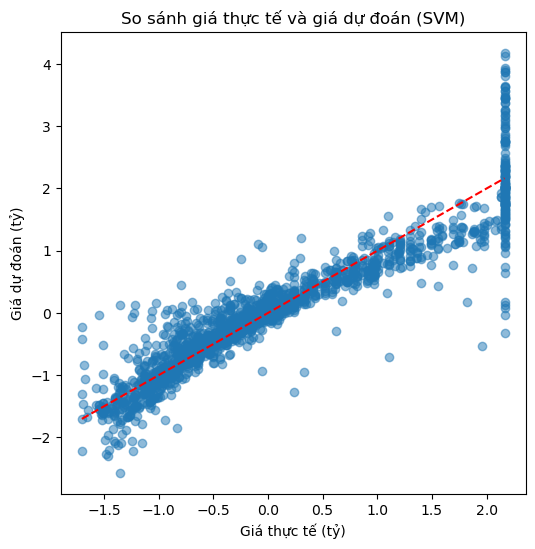

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Dự đoán
y_pred = model.predict(X_test)

# Vẽ scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # đường y = x
plt.xlabel("Giá thực tế (tỷ)")
plt.ylabel("Giá dự đoán (tỷ)")
plt.title("So sánh giá thực tế và giá dự đoán (SVM)")
plt.show()


In [12]:
# 7. GridSearchCV cho SVR
param_grid = {
    'C': [1, 10, 50, 100, 200],
    'gamma': ['scale', 0.1, 0.05, 0.01],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid = GridSearchCV(
    SVR(),
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    verbose=2,
    n_jobs=1
)

grid.fit(X_train, y_train)

print("✅ Tìm thấy bộ tham số tốt nhất:")
print(grid.best_params_)

# 8. Đánh giá mô hình tối ưu
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\n🔹 R² trên tập test: {r2:.3f}")
print(f"🔹 MAE: {mae:.3f}")
print(f"🔹 RMSE: {rmse:.3f}")


Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   3.4s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   3.3s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   3.6s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   4.1s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   4.3s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   4.4s
[CV] END ...................C=1, gamma=scale, kernel=sigmoid; total time=  11.6s
[CV] END ...................C=1, gamma=scale, kernel=sigmoid; total time=  11.6s
[CV] END ...................C=1, gamma=scale, kernel=sigmoid; total time=  11.5s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   3.3s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   3.5s
[CV] END .........................C=1, gamma=0.

In [ ]:
# bây giờ anh có 2 csv --> export từ postgreSQL , export từ oracle database --> tool compare xem 2 csv giống nhau hay ko 